This example explores a couple of libraries for displaying and handling images in Python notebooks and integrating them with GA4GH DRS services.

Some image files have been stored in the Seven Bridges Cancer Genomics Cloud as tiles of a larger image.

The following shows a basic call to DRS to get the image tile.

The images are handled in iPython display package and its Image class.

In [5]:
from fasp.loc import sbcgcDRSClient
from IPython.display import Image

drsClient = sbcgcDRSClient('~/.keys/sevenbridges_keys.json', 's3')
tile_id ='601fdb3c0a9d98531cd67f91'
tile_url = drsClient.getAccessURL(tile_id)
Image(url=tile_url) 

This a small part of a painting by James McNeil Whistler "Brown and Silver. Old Battersea Bridge". The original is in the Addison Gallery of American Art, Phillips Academy, Andover, MA.

For interest, the following call shows what the DRS server can tell us about the object.

In [2]:
drsClient.getObject(tile_id)

{'id': '601fdb3c0a9d98531cd67f91',
 'name': '5-13-11.jpg',
 'size': 7452,
 'checksums': [{'type': 'etag',
   'checksum': '9a2afd36c2facc04a186676ea792043b-1'}],
 'self_uri': 'drs://cgc-ga4gh-api.sbgenomics.com/601fdb3c0a9d98531cd67f91',
 'created_time': '2021-02-07T12:21:16Z',
 'updated_time': '2021-02-07T12:21:16Z',
 'mime_type': 'application/json',
 'access_methods': [{'type': 's3',
   'region': 'us-east-1',
   'access_id': 'aws-us-east-1'}]}

In [17]:
level6_id = '601fdaaae036a06dd8522e9d'
level6_url = drsClient.getAccessURL(level6_id)
#Image(url=level6_url, unconfined=True)

For uses where one needs to manipulate images the python image library PIL is useful. The assembleImage function in the following example uses PIL to stitch the previous tile together with adjacent tiles to form a larger image.

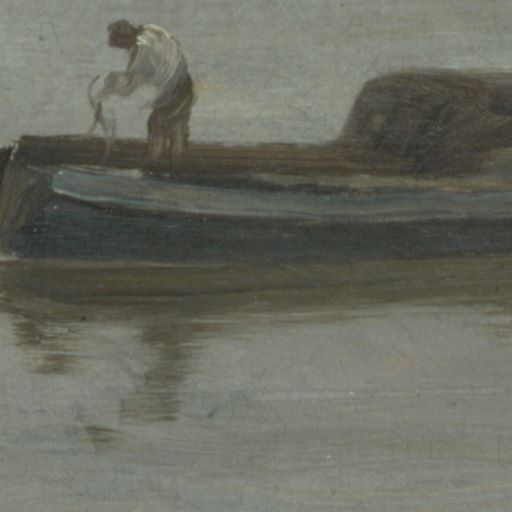

In [4]:
from PIL import Image as pim


def assembleImage(idGrid):
    cols = len(idGrid[0])
    rows = len(idGrid)
    cw = 256
    ch = 256
    final_im = pim.new('RGB', (cw * cols, ch * rows))
    y_offset = 0
    for r in idGrid:
        x_offset = 0
        for c in r:
            im = pim.open(requests.get(drsClient.getAccessURL(c), stream=True).raw)
            final_im.paste(im, (x_offset,y_offset))
            x_offset += cw
        y_offset += ch
    return final_im

region_ids = [['601fdb3c0a9d98531cd67f91','601fe543e036a06dd8522ecb'],
['601fe52be036a06dd8522ec4','601fe544e036a06dd8522ece']]
assembleImage(region_ids)